In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Datasets/Titanic-Dataset.csv",usecols = ['Age',"Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
x = df.drop("Survived",axis = 1)
y = df['Survived']
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((712, 2), (179, 2))

In [6]:
x_train["Age_imputed"] = x_train["Age"]
x_test["Age_imputed"] = x_test["Age"]

In [7]:
# For training set (random sample imputation from itself)
x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna()
           .sample(x_train['Age'].isnull().sum(), replace=True)
           .values
)

# For test set (sample from training distribution, not test itself)
x_test.loc[x_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna()
           .sample(x_test['Age'].isnull().sum(), replace=True)
           .values
)


In [8]:
x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

array([19.  , 28.  , 16.  , 30.  , 19.  , 28.  , 47.  , 39.  , 19.  ,
       30.  , 18.  , 52.  ,  3.  , 35.  ,  8.  , 48.  , 18.  , 36.  ,
       19.  , 36.  , 19.  , 34.  , 31.  , 31.  , 27.  , 25.  , 26.  ,
       18.  , 35.  , 35.  , 15.  , 71.  ,  0.67,  4.  , 34.  , 36.  ])

In [9]:
x_train.isnull().sum()

Age            141
Fare             0
Age_imputed      0
dtype: int64

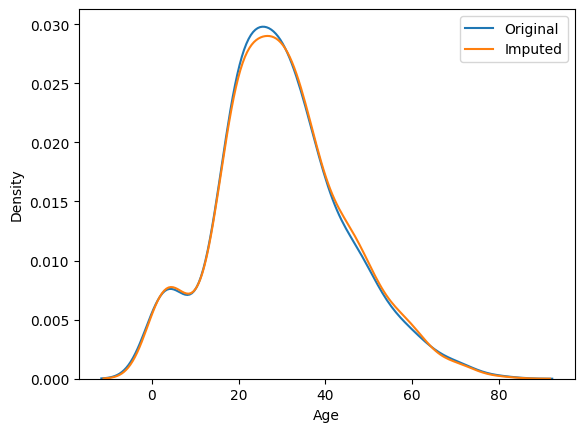

In [10]:
sns.kdeplot(x_train['Age'],label='Original')
sns.kdeplot(x_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [11]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  213.7165085187575
Variance after random imputation:  214.46586495361814


In [12]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,71.874802
Age,79.072379,213.716509,213.716509
Age_imputed,71.874802,213.716509,214.465865


<Axes: >

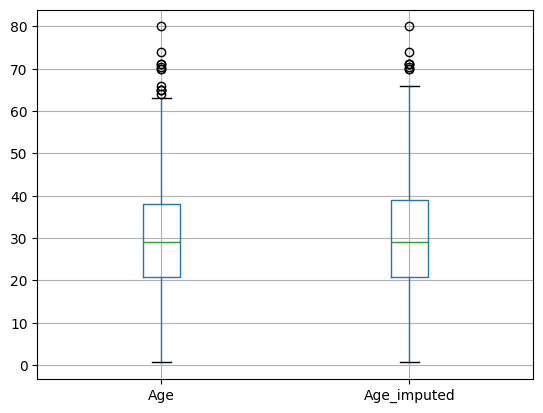

In [13]:
x_train[['Age', 'Age_imputed']].boxplot()


### In production we need to use similar random sample for each re run 
#### sampled_value = (
####    X_train['Age']
####    .dropna()
####    .sample(n=1, random_state=int(observation['Fare']))
####   .values[0]
#### )
#### random_state=int(observation['Fare']) → makes the random selection reproducible and dependent on the Fare value of the current observation.
#### If two passengers have the same Fare, they’ll get the same sampled Age.
#### If you re-run the code, you’ll always get the same Age for that observation (deterministic imputation).

# House-Train Dataset 

In [14]:
data = pd.read_csv('Datasets/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [15]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [16]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [17]:
X = data
y = data['SalePrice']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [20]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
236,NaN,TA,185500,TA,NaN
1226,Gd,TA,214000,TA,Gd
329,NaN,Fa,78000,Fa,NaN
996,NaN,TA,136500,TA,NaN
237,NaN,TA,194500,TA,NaN


In [21]:
# ---- GarageQual ----
# Train
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
           .sample(X_train['GarageQual'].isnull().sum(), replace=True)
           .values
)

# Test
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
           .sample(X_test['GarageQual'].isnull().sum(), replace=True)
           .values
)


# ---- FireplaceQu ----
# Train
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
           .sample(X_train['FireplaceQu'].isnull().sum(), replace=True)
           .values
)

# Test
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
           .sample(X_test['FireplaceQu'].isnull().sum(), replace=True)
           .values
)


In [22]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [23]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [24]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.656566
TA,0.412439,0.534231
Fa,0.040917,0.048260
Po,0.027823,0.037037
Ex,0.024550,0.034792


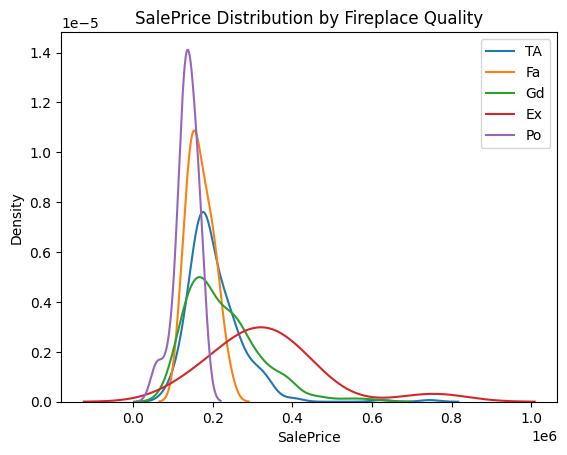

In [26]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        X_train.loc[X_train['FireplaceQu'] == category, 'SalePrice'],
        label=category
    )

plt.title("SalePrice Distribution by Fireplace Quality")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend()
plt.show()


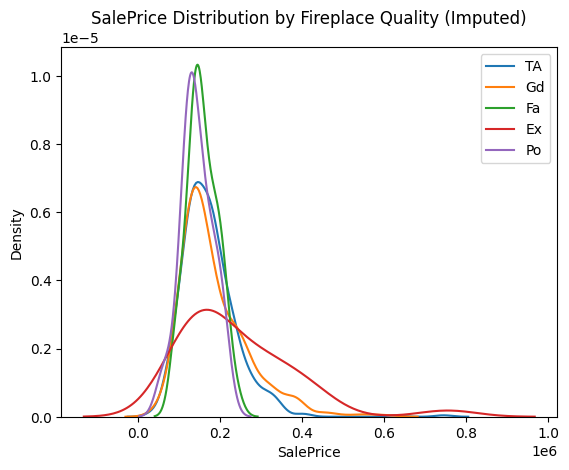

In [27]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train.loc[X_train['FireplaceQu_imputed'] == category, 'SalePrice'],
        label=category
    )

plt.title("SalePrice Distribution by Fireplace Quality (Imputed)")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend()
plt.show()
